## Global cancer patients 2015 - 2024

Age: Patient's age (20-90 years)

Gender: Male, Female, or Other

Country/Region: Country or region of the patient

Cancer Type: Various types of cancer (e.g., Breast, Lung, Colon)

Cancer Stage: Stage 0 to Stage IV

Risk Factors: Includes genetic risk, air pollution, alcohol use, smoking, obesity, etc.

Treatment Cost: Estimated cost of cancer treatment (in USD)

Survival Years: Years survived since diagnosis

Severity Score: A composite score representing cancer severity

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [3]:
csv_file = 'cancer.csv'
df = pd.read_csv(csv_file)
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [4]:
df.tail()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54
49999,PT0049999,22,Male,Pakistan,2023,5.1,9.8,3.2,0.0,0.7,Liver,Stage 0,64023.82,7.4,3.76


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [6]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [7]:
df['Patient_ID'].duplicated().sum()

0

In [8]:
# Set Patient ID to index
df = df.set_index('Patient_ID')
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
Patient_ID,,,,,,,,,,,,,,
PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [9]:
# Reformat the column labels so there is no _ character and letter is casing is formatted
df.columns = df.columns.str.replace('_', ' ')

In [10]:
df.columns = df.columns.str.capitalize()

In [11]:
df.rename(columns = {'Country region':'Country', 
                     'Treatment cost usd': 'Treatment cost'}, 
          inplace = True)

In [12]:
df.head()

,Age,Gender,Country,Year,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Cancer type,Cancer stage,Treatment cost,Survival years,Target severity score
Patient_ID,,,,,,,,,,,,,,
PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [13]:
round(df.describe(),2)

,Age,Year,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Treatment cost,Survival years,Target severity score
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,54.42,2019.48,5.00,5.01,5.01,4.99,4.99,52467.30,5.01,4.95
std,20.22,2.87,2.89,2.89,2.89,2.88,2.89,27363.23,2.88,1.20
min,20.00,2015.00,0.00,0.00,0.00,0.00,0.00,5000.05,0.00,0.90
25%,37.00,2017.00,2.50,2.50,2.50,2.50,2.50,28686.22,2.50,4.12
50%,54.00,2019.00,5.00,5.00,5.00,5.00,5.00,52474.31,5.00,4.95
75%,72.00,2022.00,7.50,7.50,7.50,7.50,7.50,76232.72,7.50,5.78
max,89.00,2024.00,10.00,10.00,10.00,10.00,10.00,99999.84,10.00,9.16


## 1. Exploratory Data analysis

Categorical data profile

In [14]:
sns.set_style('darkgrid')

In [15]:
# Profile the patients information
def countplot(x, color):
    plt.figure(figsize = [10, 6])
    sns.countplot(data = df, x = x, palette = color, edgecolor = 'black')
    plt.title(f'{x} profile of patients', fontsize = 14, fontweight = 'bold')
    plt.tight_layout()
    plt.savefig(f'{x} profile.jpeg', bbox_inches = 'tight')
    plt.show()

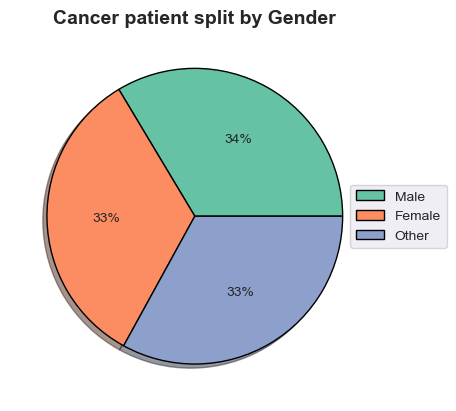

In [16]:
patient_count = df['Gender'].value_counts()

plt.pie(
        patient_count,
        shadow = True, 
        colors = sns.color_palette(palette = 'Set2'), 
        wedgeprops = {'ec':'black'},
        autopct = '%1.0f%%'
    )

plt.legend(patient_count.index, loc = 'center right', bbox_to_anchor = (1.2, 0.5))
plt.title('Cancer patient split by Gender', fontweight = 'bold', fontsize = 14)
plt.savefig('Patient.jpeg', bbox_inches = 'tight')
plt.show()

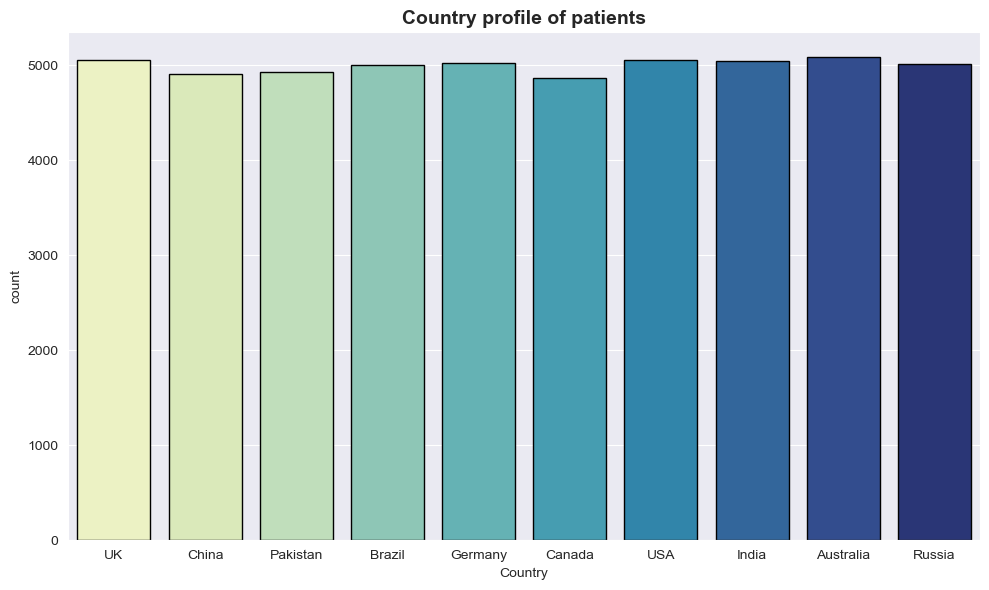

CPU times: total: 531 ms
Wall time: 531 ms


In [17]:
%%time
countplot(x = 'Country',  color = 'YlGnBu')

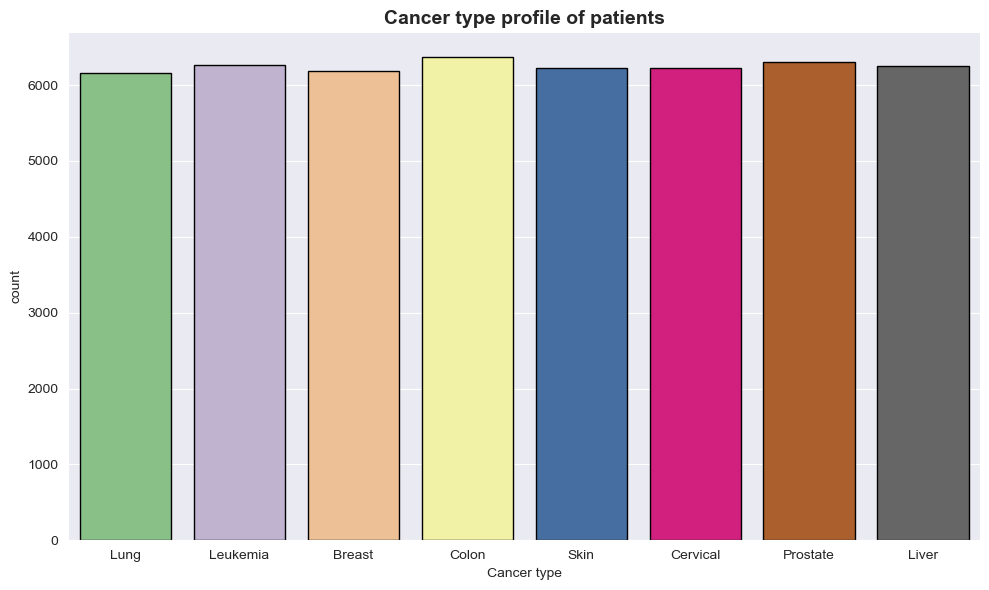

CPU times: total: 391 ms
Wall time: 400 ms


In [18]:
%%time
countplot(x = 'Cancer type', color = 'Accent')

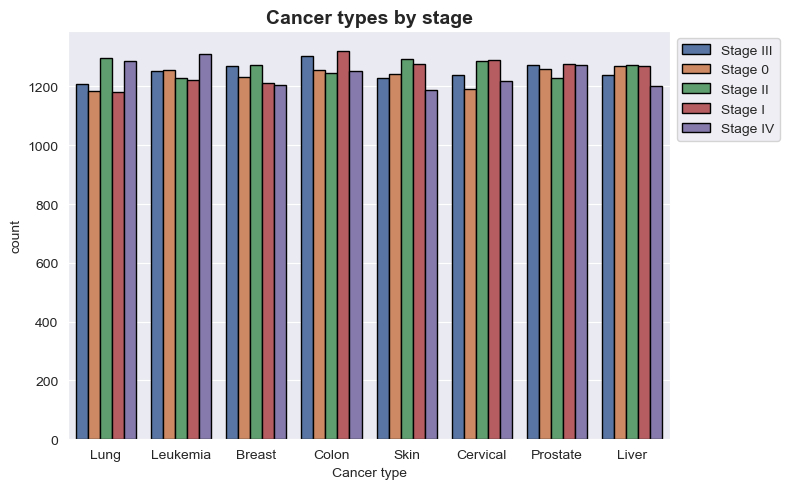

In [19]:
# Profile cancer types and the different cancer stages
plt.figure(figsize = [8, 5])
sns.countplot(data = df, x = 'Cancer type', hue = 'Cancer stage', palette = 'deep', edgecolor = 'black')
plt.title('Cancer types by stage', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'best', bbox_to_anchor = (1, 1))
plt.tight_layout()
plt.savefig('Cancer types.jpeg', bbox_inches = 'tight')
plt.show()

Numeric data profile

In [20]:
# Continuous variables profile
def histplot(x, bins):
    sns.histplot(
                data = df,
                x = x,
                bins = bins,
                kde = True,
                edgecolor = 'black',
                color = 'orange'
    )
    plt.title(f'{x} distribution', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'{x} distribution.jpeg', bbox_inches = 'tight')
    plt.show()

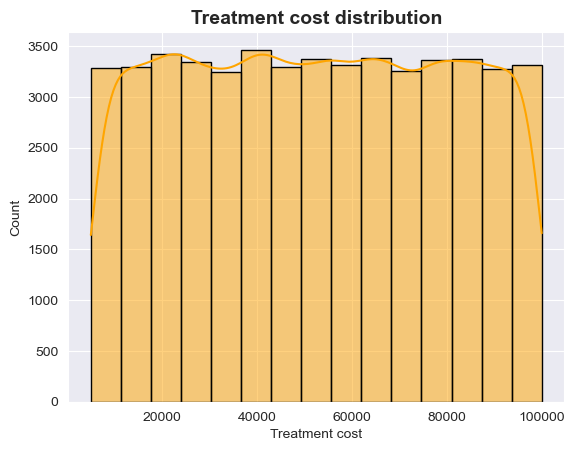

CPU times: total: 438 ms
Wall time: 436 ms


In [22]:
%%time
histplot(x = 'Treatment cost', bins = 15)

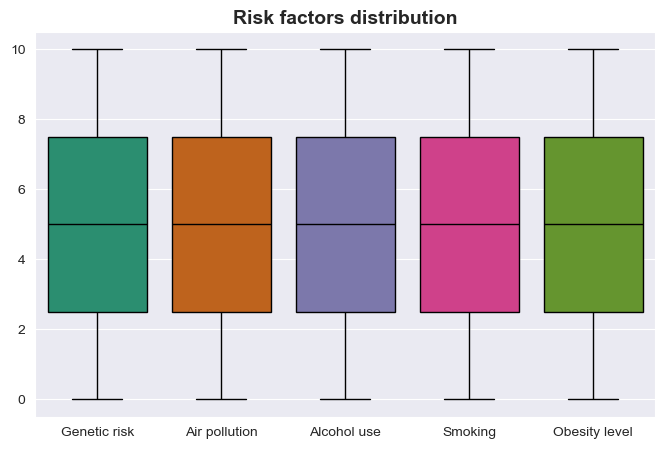

In [27]:
# PLot box and whisker to detect any outliers in other numeric values
var_1 = df.drop(['Age', 
                 'Year', 
                 'Gender', 
                 'Country', 
                 'Cancer type',
                 'Cancer stage',
                 'Treatment cost',
                 'Target severity score',
                 'Survival years'], 
                axis = 1)

plt.figure(figsize = (8, 5))
sns.boxplot(data = var_1, linecolor = 'black', palette = 'Dark2')
plt.title('Risk factors distribution', fontsize = 14, fontweight = 'bold')
plt.savefig('Numeric.jpeg', bbox_inches = 'tight')
plt.show()

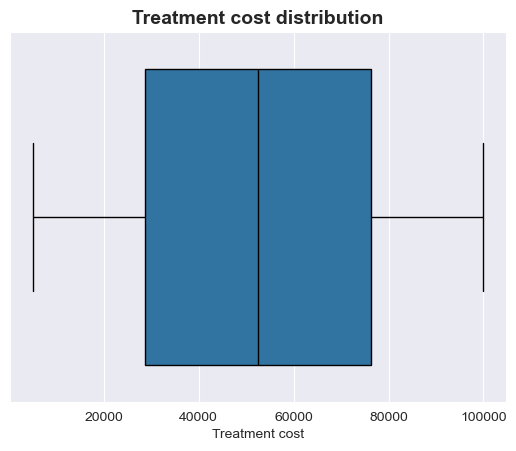

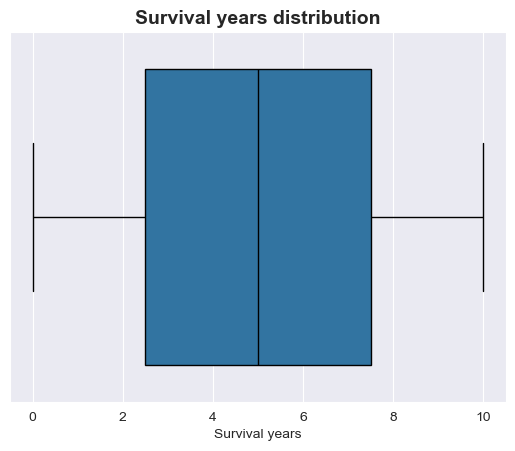

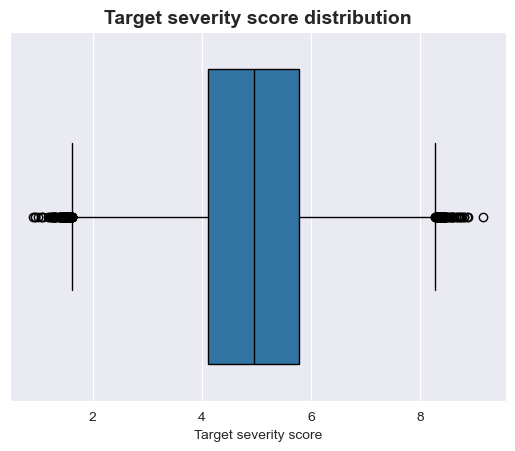

In [24]:
# Profile distribution of potential target variable
targets = ['Treatment cost', 'Survival years', 'Target severity score']

for i in targets:
    sns.boxplot(data = df[i], linecolor = 'black', orient = 'h')
    plt.title(f'{i} distribution', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'{i}.jpeg', bbox_inches = 'tight')
    plt.show()

Target variable showing many outliers. Select models that can handle these outliers

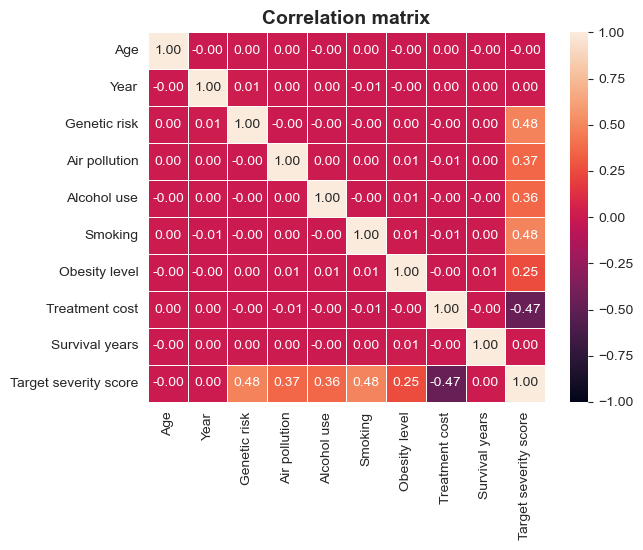

In [25]:
# Correlation matrix
corr = df.corr(numeric_only = True)
sns.heatmap(
            corr, 
            vmin = -1, 
            vmax = 1,
            annot = True,
            fmt = '.2f',
            linewidths = 0.5
)
plt.title('Correlation matrix', fontsize = 14, fontweight = 'bold')
plt.savefig('Matrix.jpeg', bbox_inches = 'tight')
plt.show()

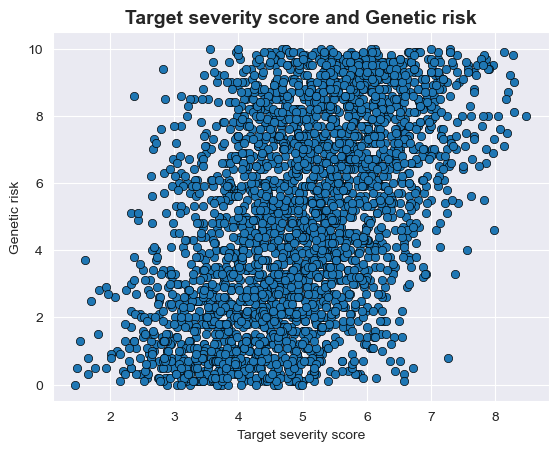

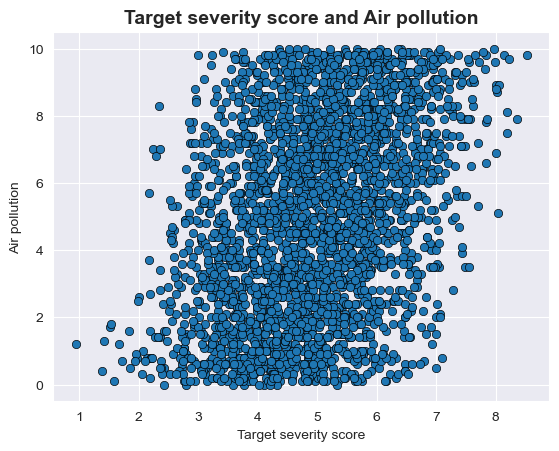

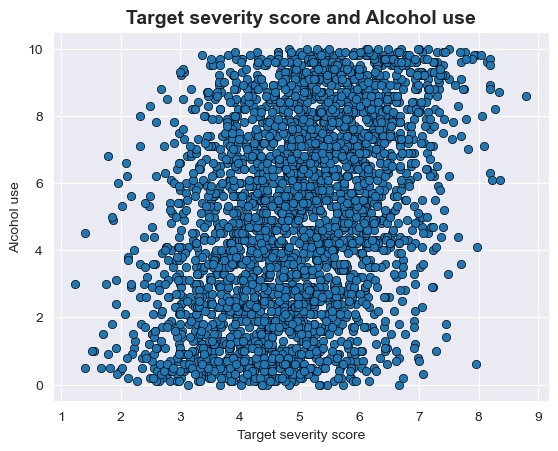

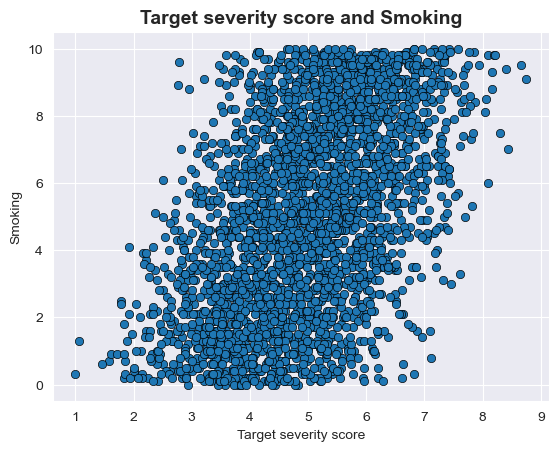

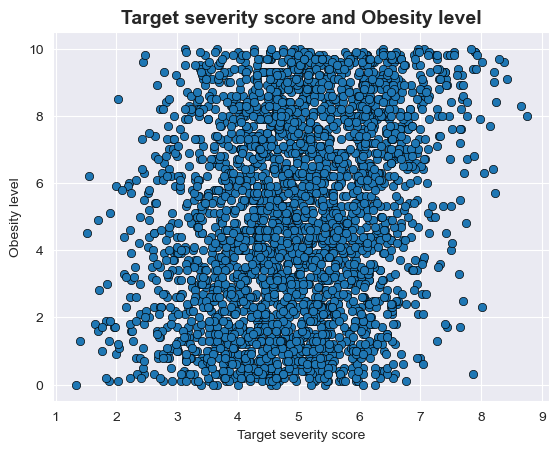

In [26]:
# Draw scatter plot of target severity score and correlating features
linear_var = ['Genetic risk', 'Air pollution', 'Alcohol use', 'Smoking', 'Obesity level']

for i in linear_var:
    sns.scatterplot(
        data = df.sample(3000),
        x = 'Target severity score',
        y = i,
        edgecolor = 'black'
    )
    plt.title(f'Target severity score and {i}', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'{i} var.jpeg', bbox_inches = 'tight')
    plt.show()